In [1]:

import pickle
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation import metrics
from neuralhydrology.nh_run import start_run, eval_run
import matplotlib.dates as mdates
import os
import numpy as np
area = 100588192.142945

# Base directory containing the test results
cwd = Path(os.getcwd())
parent_wd = cwd.parent
run_dir1 = Path(parent_wd / 'runs/Bellebeek_1203_175334')
base_dir1 = Path(parent_wd / 'runs/Bellebeek_1203_175334/test')

run_dir2 = Path(parent_wd / 'runs/Bellebeek_0705_105324')
base_dir2 = Path(parent_wd / 'runs/Bellebeek_0705_105324/test')

run_dir3 = Path(parent_wd / 'runs/Bellebeek_0705_111024')
base_dir3 = Path(parent_wd / 'runs/Bellebeek_0705_111024/test')


Epoch 1: NSE = 0.0786
Epoch 2: NSE = 0.0590
Epoch 3: NSE = -0.0096
Epoch 4: NSE = 0.1165
Epoch 5: NSE = 0.1238
Epoch 6: NSE = 0.0757
Epoch 7: NSE = 0.0883
Epoch 8: NSE = 0.2614
Epoch 9: NSE = 0.3081
Epoch 10: NSE = 0.2041
Epoch 11: NSE = 0.2330
Epoch 12: NSE = 0.1606
Epoch 13: NSE = 0.1149
Epoch 14: NSE = 0.1656
Epoch 15: NSE = 0.2070
Epoch 16: NSE = 0.2817
Epoch 17: NSE = 0.2335
Epoch 18: NSE = 0.1920
Epoch 19: NSE = 0.1196
Epoch 20: NSE = 0.2034
Epoch 21: NSE = 0.1478
Epoch 22: NSE = 0.1787
Epoch 23: NSE = 0.1746
Epoch 24: NSE = 0.1430
Epoch 25: NSE = 0.1826
Epoch 26: NSE = 0.1577
Epoch 27: NSE = 0.1642
Epoch 28: NSE = 0.1647
Epoch 29: NSE = 0.1666
Epoch 30: NSE = 0.1755
Epoch 31: NSE = 0.1766
Epoch 32: NSE = 0.1518
Epoch 33: NSE = 0.1750
Epoch 34: NSE = 0.1491
Epoch 35: NSE = 0.1614
Epoch 36: NSE = 0.1771
Epoch 37: NSE = 0.1612
Epoch 38: NSE = 0.1800
Epoch 39: NSE = 0.1749
Epoch 40: NSE = 0.1932
Epoch 41: NSE = 0.1886
Epoch 42: NSE = 0.2236
Epoch 43: NSE = 0.1602
Epoch 44: NSE = 0.1

d:\Users\ddknop\Documents\envs\neuralhydrology\lib\site-packages\neuralhydrology\datautils\utils.py:340: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
d:\Users\ddknop\Documents\envs\neuralhydrology\lib\site-packages\neuralhydrology\datautils\utils.py:383: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


NSE: 0.308
MSE: 0.388
RMSE: 0.623
KGE: 0.429
Alpha-NSE: 0.704
Beta-KGE: 1.288
Beta-NSE: 0.223
Pearson-r: 0.606
FHV: -42.747
FMS: -16.510
FLV: 68.874
Peak-Timing: 1.077
Peak-MAPE: 65.479


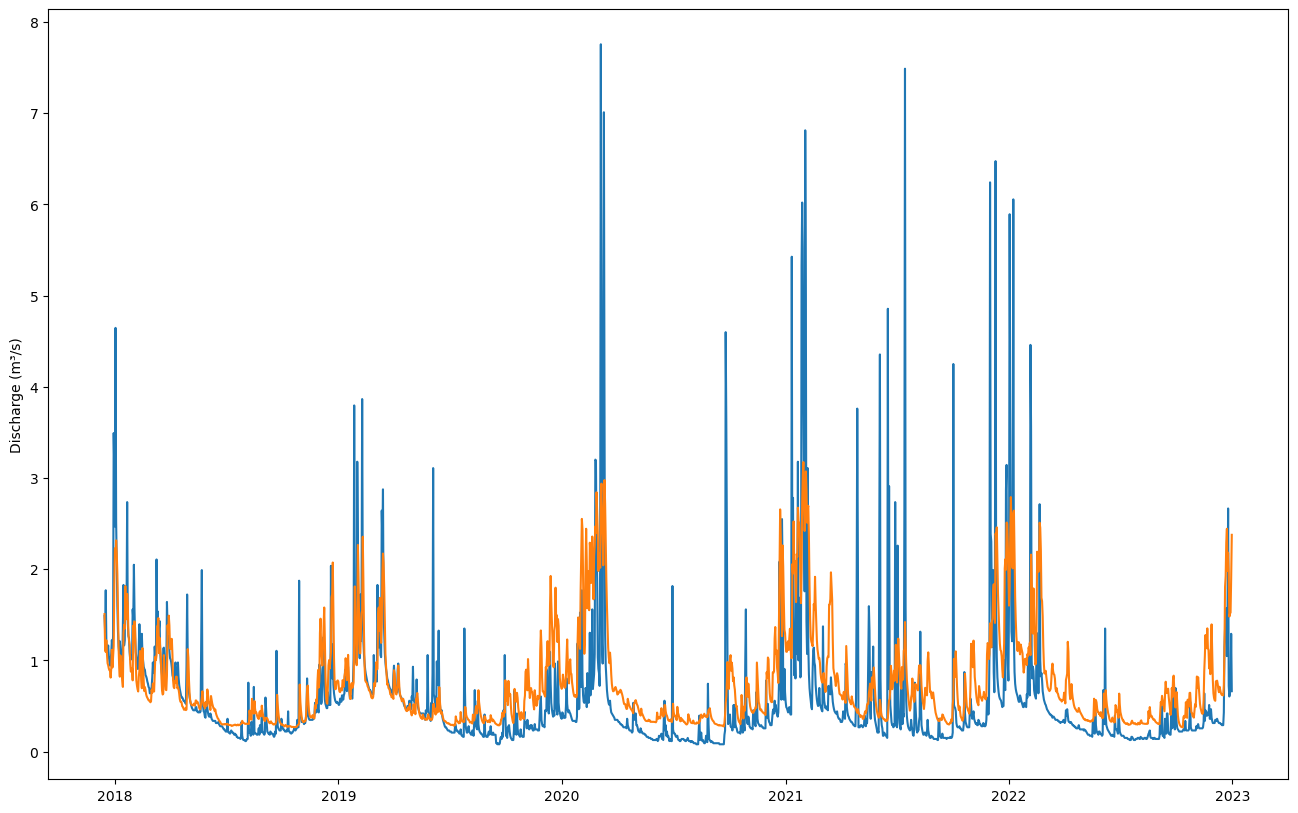

In [2]:

# Initialize variables to track the best NSE and the corresponding epoch
max_nse = -float('inf')  # Set to negative infinity initially
best_epoch = None

# Loop through epochs 1 to 50
for i in range(1, 51):  # Epochs 1 to 50
    # Format the folder name for the current epoch
    epoch_folder = base_dir1 / f"model_epoch{i:03d}"
    metrics_file = epoch_folder / "test_metrics.csv"

    # Check if the test_metrics.csv file exists
    if not metrics_file.exists():
        print(f"test_metrics.csv file not found for epoch {i}. Skipping...")
        continue

    # Load the CSV file into a DataFrame
    df = pd.read_csv(metrics_file)

    # Extract the NSE value from the dataframe (assuming NSE is in a column named 'NSE')
    if 'NSE' in df.columns:
        nse_value = df['NSE'].iloc[0]  
        print(f"Epoch {i}: NSE = {nse_value:.4f}")

        # Check if this is the highest NSE found so far
        if nse_value > max_nse:
            max_nse = nse_value
            best_epoch = i

# Output the best epoch and its NSE value
if best_epoch is not None:
    print(f"\nThe epoch with the highest NSE is Epoch {best_epoch} with an NSE value of {max_nse:.4f}")
else:
    print("No NSE values found.")


with open(run_dir1 / "test" / "model_epoch009" / "test_results.p", "rb") as fp:
    results = pickle.load(fp)
qobs = results['7']['1D']['xr']['streamflow_obs']*area/(1000*3600*24)
qsim = results['7']['1D']['xr']['streamflow_sim']*area/(1000*3600*24)

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(qobs['date'], qobs)
ax.plot(qsim['date'], qsim)
ax.set_ylabel("Discharge (m³/s)")

    #data properties

values = metrics.calculate_all_metrics(qobs.isel(time_step=-1), qsim.isel(time_step=-1))
for key, val in values.items():
    print(f"{key}: {val:.3f}")

Epoch 1: NSE = 0.0480
Epoch 2: NSE = 0.0771
Epoch 3: NSE = 0.1239
Epoch 4: NSE = 0.1853
Epoch 5: NSE = 0.2054
Epoch 6: NSE = 0.2019
Epoch 7: NSE = 0.2129
Epoch 8: NSE = 0.2342
Epoch 9: NSE = 0.2091
Epoch 10: NSE = 0.2552
Epoch 11: NSE = 0.2387
Epoch 12: NSE = 0.1854
Epoch 13: NSE = 0.2348
Epoch 14: NSE = 0.2141
Epoch 15: NSE = 0.2260
Epoch 16: NSE = 0.1869
Epoch 17: NSE = 0.2514
Epoch 18: NSE = 0.2976
Epoch 19: NSE = 0.1973
Epoch 20: NSE = 0.2707
Epoch 21: NSE = 0.2554
Epoch 22: NSE = 0.2621
Epoch 23: NSE = 0.2762
Epoch 24: NSE = 0.2546
Epoch 25: NSE = 0.2765
Epoch 26: NSE = 0.2783
Epoch 27: NSE = 0.2844
Epoch 28: NSE = 0.2634
Epoch 29: NSE = 0.2807
Epoch 30: NSE = 0.2876
Epoch 31: NSE = 0.2599
Epoch 32: NSE = 0.2639
Epoch 33: NSE = 0.2682
Epoch 34: NSE = 0.2772
Epoch 35: NSE = 0.2890
Epoch 36: NSE = 0.2797
Epoch 37: NSE = 0.2871
Epoch 38: NSE = 0.3019
Epoch 39: NSE = 0.2703
Epoch 40: NSE = 0.2845
Epoch 41: NSE = 0.2904
Epoch 42: NSE = 0.2816
Epoch 43: NSE = 0.2737
Epoch 44: NSE = 0.28

d:\Users\ddknop\Documents\envs\neuralhydrology\lib\site-packages\neuralhydrology\datautils\utils.py:340: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
d:\Users\ddknop\Documents\envs\neuralhydrology\lib\site-packages\neuralhydrology\datautils\utils.py:383: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


NSE: 0.185
MSE: 0.457
RMSE: 0.676
KGE: 0.347
Alpha-NSE: 0.790
Beta-KGE: 1.468
Beta-NSE: 0.362
Pearson-r: 0.595
FHV: -37.105
FMS: -20.279
FLV: 49.577
Peak-Timing: 1.077
Peak-MAPE: 60.898


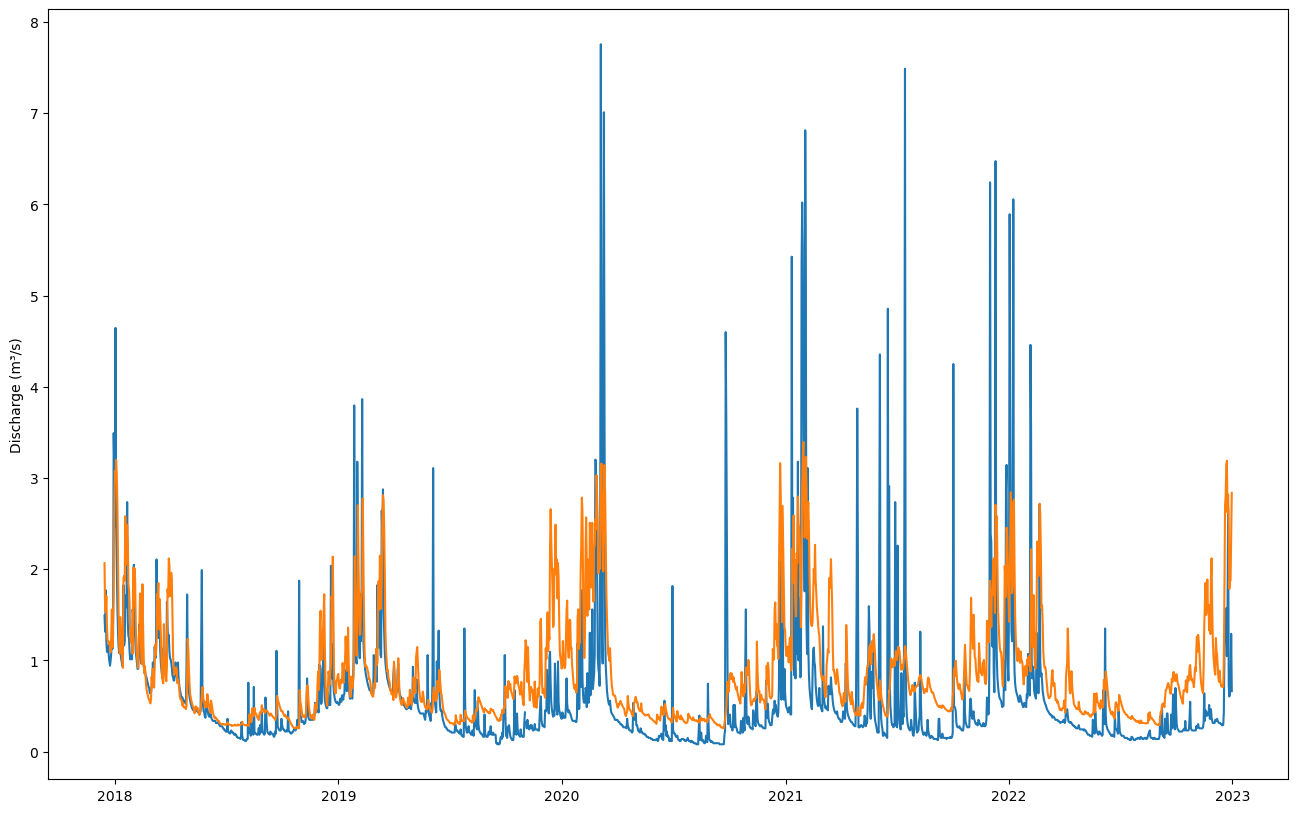

In [3]:

# Initialize variables to track the best NSE and the corresponding epoch
max_nse = -float('inf')  # Set to negative infinity initially
best_epoch = None

# Loop through epochs 1 to 50
for i in range(1, 51):  # Epochs 1 to 50
    # Format the folder name for the current epoch
    epoch_folder = base_dir2 / f"model_epoch{i:03d}"
    metrics_file = epoch_folder / "test_metrics.csv"

    # Check if the test_metrics.csv file exists
    if not metrics_file.exists():
        print(f"test_metrics.csv file not found for epoch {i}. Skipping...")
        continue

    # Load the CSV file into a DataFrame
    df = pd.read_csv(metrics_file)

    # Extract the NSE value from the dataframe (assuming NSE is in a column named 'NSE')
    if 'NSE' in df.columns:
        nse_value = df['NSE'].iloc[0]  
        print(f"Epoch {i}: NSE = {nse_value:.4f}")

        # Check if this is the highest NSE found so far
        if nse_value > max_nse:
            max_nse = nse_value
            best_epoch = i

# Output the best epoch and its NSE value
if best_epoch is not None:
    print(f"\nThe epoch with the highest NSE is Epoch {best_epoch} with an NSE value of {max_nse:.4f}")
else:
    print("No NSE values found.")


with open(run_dir2 / "test" / "model_epoch012" / "test_results.p", "rb") as fp:
    results = pickle.load(fp)
qobs = results['7']['1D']['xr']['streamflow_obs']*area/(1000*3600*24)
qsim = results['7']['1D']['xr']['streamflow_sim']*area/(1000*3600*24)

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(qobs['date'], qobs)
ax.plot(qsim['date'], qsim)
ax.set_ylabel("Discharge (m³/s)")

    #data properties

values = metrics.calculate_all_metrics(qobs.isel(time_step=-1), qsim.isel(time_step=-1))
for key, val in values.items():
    print(f"{key}: {val:.3f}")

Epoch 1: NSE = 0.0774
Epoch 2: NSE = 0.1339
Epoch 3: NSE = 0.1549
Epoch 4: NSE = 0.1386
Epoch 5: NSE = 0.2063
Epoch 6: NSE = 0.2004
Epoch 7: NSE = 0.1175
Epoch 8: NSE = 0.2219
Epoch 9: NSE = 0.1754
Epoch 10: NSE = 0.2673
Epoch 11: NSE = 0.2904
Epoch 12: NSE = 0.3217
Epoch 13: NSE = 0.2946
Epoch 14: NSE = 0.2132
Epoch 15: NSE = 0.2202
Epoch 16: NSE = 0.2356
Epoch 17: NSE = 0.2912
Epoch 18: NSE = 0.1696
Epoch 19: NSE = 0.2768
Epoch 20: NSE = 0.2041
Epoch 21: NSE = 0.1718
Epoch 22: NSE = 0.1978
Epoch 23: NSE = 0.2065
Epoch 24: NSE = 0.1983
Epoch 25: NSE = 0.1930
Epoch 26: NSE = 0.1953
Epoch 27: NSE = 0.1695
Epoch 28: NSE = 0.1961
Epoch 29: NSE = 0.1904
Epoch 30: NSE = 0.1858
Epoch 31: NSE = 0.1884
Epoch 32: NSE = 0.1995
Epoch 33: NSE = 0.1565
Epoch 34: NSE = 0.2043
Epoch 35: NSE = 0.1525
Epoch 36: NSE = 0.1693
Epoch 37: NSE = 0.1717
Epoch 38: NSE = 0.1642
Epoch 39: NSE = 0.1557
Epoch 40: NSE = 0.1730
Epoch 41: NSE = 0.1627
Epoch 42: NSE = 0.1579
Epoch 43: NSE = 0.1886
Epoch 44: NSE = 0.16

d:\Users\ddknop\Documents\envs\neuralhydrology\lib\site-packages\neuralhydrology\datautils\utils.py:340: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
d:\Users\ddknop\Documents\envs\neuralhydrology\lib\site-packages\neuralhydrology\datautils\utils.py:383: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


NSE: 0.164
MSE: 0.469
RMSE: 0.685
KGE: 0.354
Alpha-NSE: 0.924
Beta-KGE: 1.533
Beta-NSE: 0.413
Pearson-r: 0.643
FHV: -24.066
FMS: -10.334
FLV: 28.401
Peak-Timing: 1.000
Peak-MAPE: 56.911


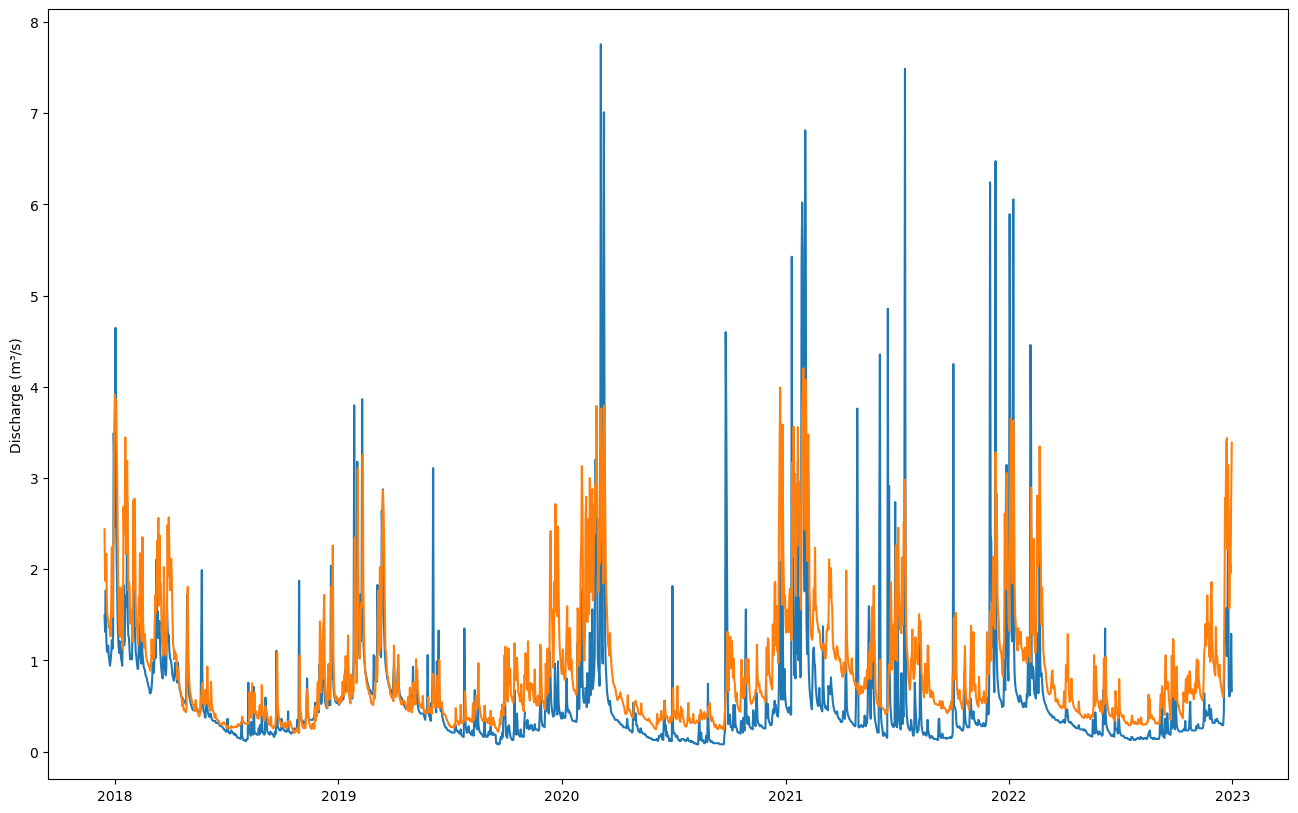

In [4]:

# Initialize variables to track the best NSE and the corresponding epoch
max_nse = -float('inf')  # Set to negative infinity initially
best_epoch = None

# Loop through epochs 1 to 50
for i in range(1, 51):  # Epochs 1 to 50
    # Format the folder name for the current epoch
    epoch_folder = base_dir3 / f"model_epoch{i:03d}"
    metrics_file = epoch_folder / "test_metrics.csv"

    # Check if the test_metrics.csv file exists
    if not metrics_file.exists():
        print(f"test_metrics.csv file not found for epoch {i}. Skipping...")
        continue

    # Load the CSV file into a DataFrame
    df = pd.read_csv(metrics_file)

    # Extract the NSE value from the dataframe (assuming NSE is in a column named 'NSE')
    if 'NSE' in df.columns:
        nse_value = df['NSE'].iloc[0]  
        print(f"Epoch {i}: NSE = {nse_value:.4f}")

        # Check if this is the highest NSE found so far
        if nse_value > max_nse:
            max_nse = nse_value
            best_epoch = i

# Output the best epoch and its NSE value
if best_epoch is not None:
    print(f"\nThe epoch with the highest NSE is Epoch {best_epoch} with an NSE value of {max_nse:.4f}")
else:
    print("No NSE values found.")


with open(run_dir3 / "test" / "model_epoch038" / "test_results.p", "rb") as fp:
    results = pickle.load(fp)
qobs = results['7']['1D']['xr']['streamflow_obs']*area/(1000*3600*24)
qsim = results['7']['1D']['xr']['streamflow_sim']*area/(1000*3600*24)

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(qobs['date'], qobs)
ax.plot(qsim['date'], qsim)
ax.set_ylabel("Discharge (m³/s)")

    #data properties

values = metrics.calculate_all_metrics(qobs.isel(time_step=-1), qsim.isel(time_step=-1))
for key, val in values.items():
    print(f"{key}: {val:.3f}")

In [6]:
def FHV(Qmod, Qobs, exceedance_prob=0.02):
    """
    Calculate the percentage bias in percent bias in flow duration curve high-segment volume (FHV) as defined in Yilmaz et al. (2008)

    Parameters
    ----------
    Qmod: numpy.array
        modelled flows
    Qobs: numpy.array
        observed flows
    exceedance_prob: float, default = 0.02
        highest fraction of flows to take into account for calculation of the bias
    Returns
    --------
    fhv: float
        percentage bias in percent bias in flow duration curve high-segment volume

    """
    nan_bool = np.isnan(Qobs)
    Qmod_nonan = Qmod[~nan_bool]
    Qobs_nonan = Qobs[~nan_bool]
    Q_mod_sorted = np.sort(Qmod_nonan)
    Q_obs_sorted = np.sort(Qobs_nonan)

    CDF_obs_distribution = ECDF(Q_obs_sorted)
    CDF_obs = CDF_obs_distribution(Q_obs_sorted)
    CDF_mod_distribution = ECDF(Q_mod_sorted)
    CDF_mod = CDF_mod_distribution(Q_mod_sorted)

    Q_obs_H = Q_obs_sorted[CDF_obs > 1 - exceedance_prob]
    Q_mod_H = Q_mod_sorted[CDF_mod > 1 - exceedance_prob]
    if len(Q_obs_H) != len(Q_mod_H):
        # occurs when e.g. modesl produces a constant input
        if len(Q_obs_H) < len(Q_mod_H):
            len_obs = len(Q_obs_H)
            Q_mod_H = Q_mod_H[0:len_obs]
        else: 
            len_mod = len(Q_mod_H)
            Q_obs_H = Q_obs_H[0:len_mod]
    fhv = 100 * np.nansum(Q_mod_H - Q_obs_H) / np.nansum(Q_obs_H)
    return fhv

In [7]:
print(qobs)
print(qsim)
qsim_avg = qsim.mean(skipna = True)
qobs_avg = qobs.mean(skipna=True)
print(qsim_avg)
print(qobs_avg)
qsim_avg.values/qobs_avg.values

<xarray.DataArray 'streamflow_obs' (date: 1843, time_step: 1)>
array([[1.49019537],
       [1.31556315],
       [1.76960704],
       ...,
       [0.7101713 ],
       [1.29227889],
       [0.66360264]])
Coordinates:
  * date       (date) datetime64[ns] 2017-12-15 2017-12-16 ... 2022-12-31
  * time_step  (time_step) int64 0
<xarray.DataArray 'streamflow_sim' (date: 1843, time_step: 1)>
array([[2.43808741],
       [1.87280907],
       [2.12937981],
       ...,
       [1.95778407],
       [2.79979296],
       [3.38780556]])
Coordinates:
  * date       (date) datetime64[ns] 2017-12-15 2017-12-16 ... 2022-12-31
  * time_step  (time_step) int64 0
<xarray.DataArray 'streamflow_sim' ()>
array(0.88906931)
<xarray.DataArray 'streamflow_obs' ()>
array(0.57984489)


1.5332881646138377

In [8]:
def NSE_LF(Qmod, Qobs):
    """
    Calculate the low-flow Nash-Sutcliffe Efficiency (NSE_LF) using inverse flows.
    This variant of NSE emphasizes performance during low-flow periods.

    Only calculates for timestamps where no NaN values are present in the observed flows.

    Parameters
    ----------
    Qmod: numpy.array
        Modelled flows
    Qobs: numpy.array
        Observed flows

    Returns
    -------
    nse_lf: float
        Low-flow Nash-Sutcliffe Efficiency

    """
    nan_bool = np.isnan(Qobs)
    Qmod_nonan = Qmod[~nan_bool]
    Qobs_nonan = Qobs[~nan_bool]

    # Avoid division by zero using epsilon (1/100th of mean observed flow)
    epsilon = np.mean(Qobs_nonan) / 100

    Qmod_inv = 1 / (Qmod_nonan + epsilon)
    Qobs_inv = 1 / (Qobs_nonan + epsilon)

    T = (Qobs_inv - Qmod_inv) ** 2
    N = (Qobs_inv - np.mean(Qobs_inv)) ** 2

    nse_lf = 1 - np.sum(T) / np.sum(N)
    return nse_lf

In [9]:
NSE_LF(qsim.values, qobs.values)

-0.05142330808280837

In [10]:
from statsmodels.distributions.empirical_distribution import ECDF

fhv = FHV(qsim.values, qobs.values, exceedance_prob=0.02)
print(fhv)

-24.066475592455582


Vanaf hier ensemble

In [11]:

# Best epochs for each run directory
epochs = [9,38,12]

# Initialize an empty dictionary to hold the ensemble mean results
ensemble_mean = {}

# Loop through each run directory and corresponding epoch
for run_dir, epoch in zip([run_dir1, run_dir2, run_dir3], epochs):
    # Define the path to the results file for the specified epoch
    test_results_path = run_dir / "test" / f"model_epoch{epoch:03}" / "test_results.p"

    # Load the results from the pickle file
    with open(test_results_path, "rb") as fp:
        results = pickle.load(fp)

    # Extract observed and simulated streamflow data
    # Note: Adjust the basin id (here '6') and timestep ('1D') as needed
    qobs = results['7']['1D']['xr']['streamflow_obs'] * area / (1000 * 3600 * 24)
    qsim = results['7']['1D']['xr']['streamflow_sim'] * area / (1000 * 3600 * 24)

    # Store the simulations (this will be used to calculate the ensemble mean later)
    ensemble_mean[run_dir] = qsim

# Now calculate the ensemble mean across the different runs
# Assuming all simulations are aligned by basin and timestep
qsim_ensemble = np.mean(np.stack(list(ensemble_mean.values())), axis=0)

# To calculate NSE for the ensemble mean, first load the observed data (qobs)
# Assuming observed data is same for all runs, so you can just load it once from any of the runs
qobs = results['7']['1D']['xr']['streamflow_obs'] * area / (1000 * 3600 * 24)

# Define the NSE calculation function
def nse(simulated, observed):
    return 1 - np.sum((simulated - observed) ** 2) / np.sum((observed - np.mean(observed)) ** 2)

print(qsim_ensemble)
print(qobs)
# Calculate NSE for the ensemble mean
nse_ensemble = nse(qsim_ensemble, qobs)

print(f'Ensemble mean NSE: {nse_ensemble}')

[[1.37794694]
 [1.00374063]
 [1.10172753]
 ...
 [1.58248796]
 [2.12584889]
 [2.64788735]]
<xarray.DataArray 'streamflow_obs' (date: 1843, time_step: 1)>
array([[1.49019537],
       [1.31556315],
       [1.76960704],
       ...,
       [0.7101713 ],
       [1.29227889],
       [0.66360264]])
Coordinates:
  * date       (date) datetime64[ns] 2017-12-15 2017-12-16 ... 2022-12-31
  * time_step  (time_step) int64 0
Ensemble mean NSE: <xarray.DataArray 'streamflow_obs' ()>
array(0.33109149)


In [12]:
print(len(qsim))
print(len(qobs))
print(qobs)

1843
1843
<xarray.DataArray 'streamflow_obs' (date: 1843, time_step: 1)>
array([[1.49019537],
       [1.31556315],
       [1.76960704],
       ...,
       [0.7101713 ],
       [1.29227889],
       [0.66360264]])
Coordinates:
  * date       (date) datetime64[ns] 2017-12-15 2017-12-16 ... 2022-12-31
  * time_step  (time_step) int64 0


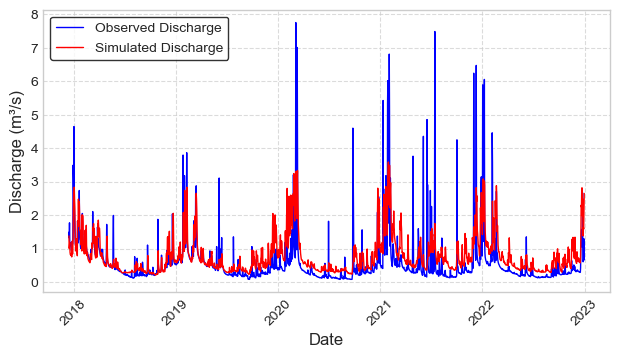

In [14]:
plt.figure(figsize=(6.3, 3.5))

# Plot observed streamflow
plt.plot(qobs['date'], qobs, label='Observed Discharge', color='blue', linewidth=1)

# Plot simulated streamflow
plt.plot(qobs['date'], qsim_ensemble, label='Simulated Discharge', color='red', linewidth = 1)

# Add axis labels and styling
plt.xlabel('Date', fontsize=12)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)
plt.style.use('seaborn-v0_8-whitegrid')

# Add legend
plt.legend(frameon=True, edgecolor='black')
plt.savefig("Bellebeek_plot_single_basin.png", dpi=1000, bbox_inches='tight') 
# Show plot
plt.show()


In [42]:

qobs_isna = np.isnan(qobs.values)
qobs_isna_def = qobs.values[~qobs_isna]
qobs_mean =qobs_isna_def.mean()
print(qobs_mean)


qsim_ensemble_mean =qsim_ensemble.mean()
print(qsim_ensemble_mean)

qsim_ensemble_mean/qobs_mean

0.5798448923931565
0.7731784723666627


1.3334229248369731

In [43]:
def FHV(Qmod, Qobs, exceedance_prob=0.02):
    """
    Calculate the percentage bias in percent bias in flow duration curve high-segment volume (FHV) as defined in Yilmaz et al. (2008)

    Parameters
    ----------
    Qmod: numpy.array
        modelled flows
    Qobs: numpy.array
        observed flows
    exceedance_prob: float, default = 0.02
        highest fraction of flows to take into account for calculation of the bias
    Returns
    --------
    fhv: float
        percentage bias in percent bias in flow duration curve high-segment volume

    """
    nan_bool = np.isnan(Qobs)
    Qmod_nonan = Qmod[~nan_bool]
    Qobs_nonan = Qobs[~nan_bool]
    Q_mod_sorted = np.sort(Qmod_nonan)
    Q_obs_sorted = np.sort(Qobs_nonan)

    CDF_obs_distribution = ECDF(Q_obs_sorted)
    CDF_obs = CDF_obs_distribution(Q_obs_sorted)
    CDF_mod_distribution = ECDF(Q_mod_sorted)
    CDF_mod = CDF_mod_distribution(Q_mod_sorted)

    Q_obs_H = Q_obs_sorted[CDF_obs > 1 - exceedance_prob]
    Q_mod_H = Q_mod_sorted[CDF_mod > 1 - exceedance_prob]
    if len(Q_obs_H) != len(Q_mod_H):
        # occurs when e.g. modesl produces a constant input
        if len(Q_obs_H) < len(Q_mod_H):
            len_obs = len(Q_obs_H)
            Q_mod_H = Q_mod_H[0:len_obs]
        else: 
            len_mod = len(Q_mod_H)
            Q_obs_H = Q_obs_H[0:len_mod]
    fhv = 100 * np.nansum(Q_mod_H - Q_obs_H) / np.nansum(Q_obs_H)
    return fhv

In [44]:
from statsmodels.distributions.empirical_distribution import ECDF
qobs_def = qobs.values
print(qsim_ensemble)

fhv = FHV(qsim_ensemble, qobs_def, exceedance_prob=0.02)
print(fhv)

[[1.37794694]
 [1.00374063]
 [1.10172753]
 ...
 [1.58248796]
 [2.12584889]
 [2.64788735]]
-37.34071694437027


In [45]:
NSE_LF(qsim_ensemble, qobs_def)

0.04789194675451913